# Predicting probabilities for global remote work salaries over the next few years
 
<hr>

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
import geopandas

## Preparing the dataset

In [2]:
# Load all datasets
data = pd.read_csv('..\data\salaries.csv')
codes = pd.read_csv('..\data\codes.csv')
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [58]:
salary_data = data.filter(items=["salary_in_usd","company_location"])
salary_data = salary_data.rename(columns={"salary_in_usd":"salary","company_location":"country_code"})
salary_data = salary_data.drop(salary_data[salary_data.salary > salary_data.salary.mean()].index)
codes = codes.rename(columns={"Alpha-2 code":"country_code","Alpha-3 code":"iso_a3"})
salary_data = pd.merge(salary_data,codes,on="country_code")
salary_world_data = pd.merge(salary_data,world,on="iso_a3",how="outer")
salary_world_data = salary_world_data.drop(columns=['iso_a3','pop_est','continent','gdp_md_est'])
salary_world_data = salary_world_data.groupby(['name']).agg({'country_code':'first','geometry':'first','salary':'mean'}).reset_index()

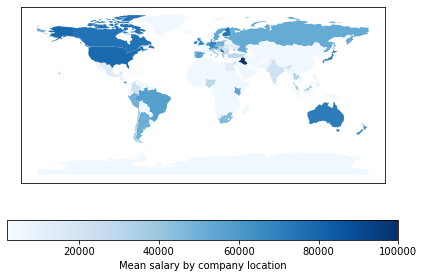

In [62]:
data_geo = geopandas.GeoDataFrame(salary_world_data)

fig, ax = plt.subplots(1, 1)
data_geo.plot(column = 'salary',
                       missing_kwds = {'color':'aliceblue'},
                       cmap = 'Blues',
                       ax = ax,
                       legend = True,
                       legend_kwds = {'label': 'Mean salary by company location','orientation': "horizontal"})
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
fig.tight_layout()

In [63]:
salary_data_res = data.filter(items=["salary_in_usd","employee_residence"])
salary_data_res = salary_data_res.rename(columns={"salary_in_usd":"salary","employee_residence":"country_code"})
salary_data_res = salary_data_res.drop(salary_data_res[salary_data_res.salary > salary_data_res.salary.mean()].index)
codes = codes.rename(columns={"Alpha-2 code":"country_code","Alpha-3 code":"iso_a3"})
salary_data_res = pd.merge(salary_data_res,codes,on="country_code")
salary_world_data_res = pd.merge(salary_data_res,world,on="iso_a3",how="outer")
salary_world_data_res = salary_world_data_res.drop(columns=['iso_a3','pop_est','continent','gdp_md_est'])
salary_world_data_res = salary_world_data_res.groupby(['name']).agg({'country_code':'first','geometry':'first','salary':'mean'}).reset_index()

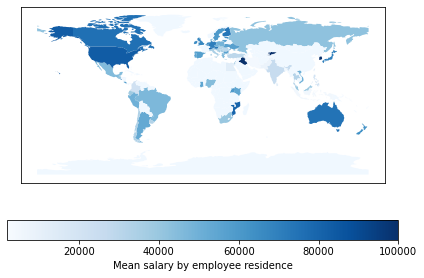

In [64]:
data_geo_res = geopandas.GeoDataFrame(salary_world_data_res)

fig, ax = plt.subplots(1, 1)
data_geo_res.plot(column = 'salary',
                       missing_kwds = {'color':'aliceblue'},
                       cmap = 'Blues',
                       ax = ax,
                       legend = True,
                       legend_kwds = {'label': 'Mean salary by employee residence','orientation': "horizontal"})
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
fig.tight_layout()